# PROFIT PREDICTION WITH LOGISTIC REGRESSION

# Linear Regression
Linear regression is a technique used to find the linear relationship  between one or more predictor variable(s) and one outcome variable. The simplest version of the regression equation with one dependent and one independent variable is y = mx + c, where y is the estimated dependent variable, c is the constant, m is the regression coefficient, and x represents the independent variable. Likewise for the multiple linear regression, the equation is y = m$x_{o}$+m$x_{1}$x$x_{1}$+...m$x_{n}$x$x_{n}$. The best fitted line is drawn and the value is predicted with the help of the linear line.

## Loading the Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset and Creating the Dataframe

In [93]:
# Importing the csv file from the system
df = pd.read_csv('50_Startups.csv')

# 1. Understanding the data

## Checking the number of rows and columns in the csv file

In [94]:
df.shape

(50, 5)

## Viewing the first five rows of the data frame

In [95]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Viewing the last five rows of the data frame

In [96]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## Checking the datatypes of the feature available

In [97]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## Seeing the statistical description of the dataframe

In [98]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Viewing the information of dataframe

In [99]:
df.info()
# result shows 50 rows,5 col, total non-null values and datatypes of each variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# 2. Data Analysis

## Histogram

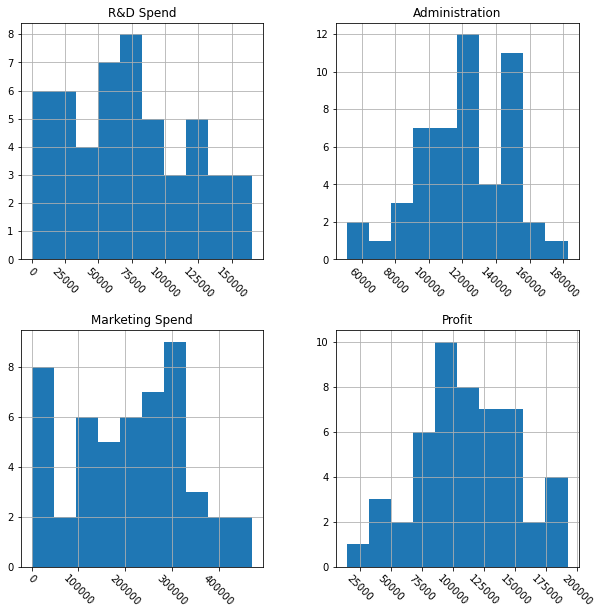

In [100]:
# plotting the histogram to visualize the numerical data
df.hist(xrot=-45,figsize=(10,10))
plt.show()

Text(0, 0.5, 'Profit')

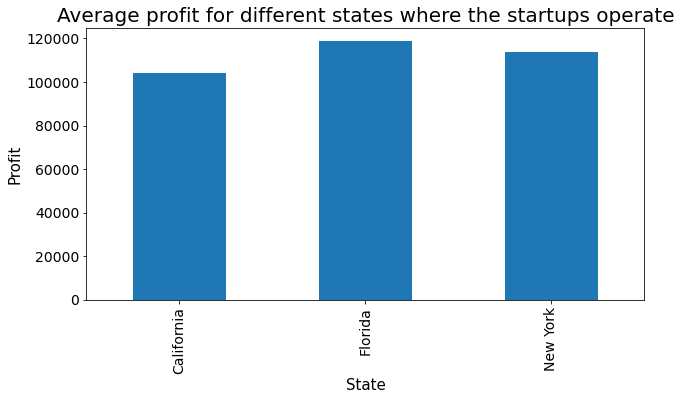

In [101]:
# creating object of the figure
o = df.groupby(['State'])['Profit'].mean().plot.bar(figsize=(10,5),fontsize=14)
# title for the bar graph
o.set_title('Average profit for different states where the startups operate',fontsize=20)
# creating the label for x and y axis
o.set_xlabel('State',fontsize=15)
o.set_ylabel('Profit',fontsize=15)

## density plot

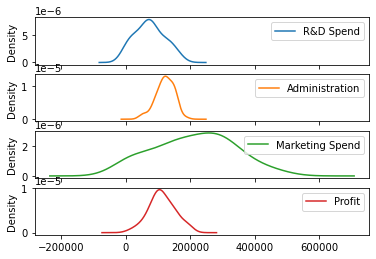

In [102]:
# Visualizing the distribution of each numerical variable
df.plot(kind = 'density',subplots = True, sharex = True)
plt.show()

## Box and whisker plot

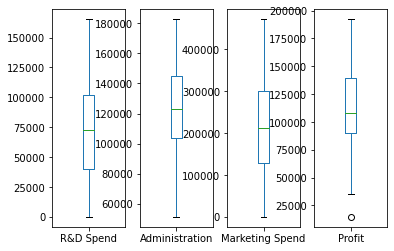

In [103]:
# Visualizing the distribution of each numerical variable
# shows the min, max, Q1, median ,Q3 and outliers
df.plot(kind = 'box',subplots = True, sharex = False, sharey = False)
plt.show()

## Scatter Plot Between Profit(Dependent variable) and R&D Spend(Independent variable)

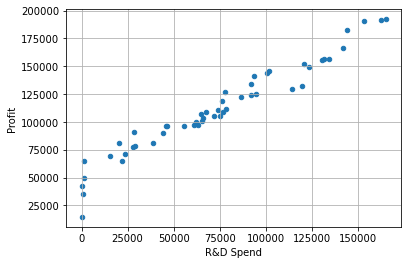

In [104]:
df.plot.scatter(x='R&D Spend', y = 'Profit')
plt.grid()
plt.show()
# Here the values(profit) are increasing with increase in R&D Spend, therefore, have have good linear relation with Marketing Spend

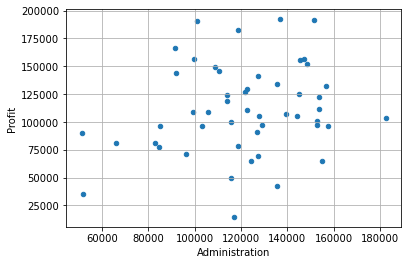

In [105]:
df.plot.scatter(x='Administration', y = 'Profit')
plt.grid()
plt.show()
# Here the values(profit) are increasing as well as decreasing with increase in Administration So, They don't have good linear relation between them

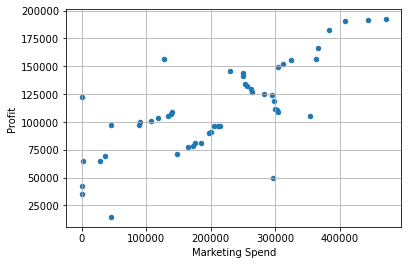

In [106]:
df.plot.scatter(x='Marketing Spend', y = 'Profit')
plt.grid()
plt.show()
# Here the values(profit) have fairly good linear relation with Marketing Spend

# Data Cleaning

In [107]:
# seeing the number of rows and columns to see if there is any duplicate value that is removed after performing operation to remove duplicate values
df.shape

(50, 5)

In [108]:
# dropping duplicate values
df = df.drop_duplicates()
# seeing if there is any changes in our rows and columns
df.shape

(50, 5)

In [109]:
# Checking if there is any null value
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [110]:
# Converting Categorical data into Dummy variables
dummy = pd.get_dummies(df["State"])
df = pd.concat([dummy, df], axis=1)
# deleting profit from the dataframe
df.drop(['State'], inplace=True, axis=1)
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


no null value Found

# Regression task

In [111]:
# Seperating Independent (X) and Dependent variable (y)
y = df['Profit']

X = df.drop('Profit',axis = 1)

In [112]:
X.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend
0,0,0,1,165349.20,136897.80,471784.10
1,1,0,0,162597.70,151377.59,443898.53
2,0,1,0,153441.51,101145.55,407934.54
3,0,0,1,144372.41,118671.85,383199.62
4,0,1,0,142107.34,91391.77,366168.42


In [113]:
# Checking number of rows & columns of independent variable
X.shape

(50, 6)

In [114]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [115]:
# Checking number of rows & columns of independent variable
y.shape

(50,)

## Splitting dataset into Train and Test data

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
# taking 20% data for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)

In [118]:
x_train.shape,x_test.shape, y_train.shape, x_test.shape

((40, 6), (10, 6), (40,), (10, 6))

## Building the Model (LR)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
ml = LinearRegression()

In [121]:
# passing training data to form a linear regression model
ml.fit(x_train,y_train)

LinearRegression()

In [122]:
# seeing the testing data (independent var.) (5)
x_test.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend
27,0,0,1,72107.60,127864.55,353183.81
35,0,0,1,46014.02,85047.44,205517.64
40,1,0,0,28754.33,118546.05,172795.67
38,0,0,1,20229.59,65947.93,185265.10
2,0,1,0,153441.51,101145.55,407934.54


In [123]:
# seeing the total rows and columns of testing data (independent var) 
x_test.shape

(10, 6)

In [124]:
# predicting the value using our ml model
y_pred = ml.predict(x_test)
y_pred

array([114664.41715868,  90593.1553162 ,  75692.84151574,  70221.88679651,
       179790.25514874, 171576.92018522,  49753.58752028, 102276.65888936,
        58649.37795761,  98272.0256113 ])

In [125]:
# seeing total rows and columns of predicted value
y_pred.shape

(10,)

In [126]:
# creating new data frame to see the difference in actual and predicted value
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Difference':y_test-y_pred})

In [127]:
# seeing difference
df1.head()

,Actual,Predicted,Difference
27,105008.31,114664.417159,-9656.107159
35,96479.51,90593.155316,5886.354684
40,78239.91,75692.841516,2547.068484
38,81229.06,70221.886797,11007.173203
2,191050.39,179790.255149,11260.134851


## Getting Intercepts and Coefficient for y = mx + c

In [128]:
ml.intercept_
print('intercept(c): ', ml.intercept_)

intercept(c):  49834.885073205136


In [129]:
ml.coef_
print('coefficient(m): ', ml.coef_)

coefficient(m):  [-2.85177769e+02  2.97560876e+02 -1.23831070e+01  7.74342081e-01
 -9.44369585e-03  2.89183133e-02]


In [136]:
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [140]:
# Predicting for one independent data i.e. no. 0
ml.predict([[0,0,1,165349.20,136897.80,471784.10]])

C:\Users\Sujan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([190209.72482532])

In [137]:
X.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend
0,0,0,1,165349.20,136897.80,471784.10
1,1,0,0,162597.70,151377.59,443898.53
2,0,1,0,153441.51,101145.55,407934.54
3,0,0,1,144372.41,118671.85,383199.62
4,0,1,0,142107.34,91391.77,366168.42


In [133]:
# Checking manually if the model is accurate or not
# here, formula - y = m1x1 + m2x2 + m3x3 + m4x4+ m5x5 + c
# we check on 1st row data, we've got the intercepts and coeffiecint 

y = -2.85177769e+02 * 0 + -2.85177769e+02 * 0 + -1.23831070e+01 * 1 +7.74342081e-01 * 165349.20 + -9.44369585e-03 * 136897.80  + 2.89183133e-02 * 471784.10 + 49834.885073205136

In [134]:
y

190209.72481391474

from above comaparsion with the models predicted value and manually we can see that our model is predicting accurately 

# Evaluation Metrics of Linear Model

In [87]:
from sklearn.metrics import r2_score

In [88]:
# R-Squared reading of our model is good with 0.9649 score value
score = r2_score(y_test,y_pred) 
print("score",score)

score 0.9649618042060807


In [89]:
from sklearn import metrics

In [91]:
# different measure of errors of our ml model

print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  7698.119817481728
Mean Squared Error:  79495441.50403309
Root Mean Squared Error:  8916.021618638724


# Conclusion

In this assignment of multivariate linear regression, I took the dataset containing 5 columns where profit is an dependent and rest are independent variables. The categorical data is (State) is converted into the dummy data and the model is trained. The predicted value has the accuracy of 96.59%.